In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import plot_importance

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

In [2]:
df_raw = pd.read_csv('features.csv').drop(['Sex','Age', 'Species', 'Call'], axis=1)
df_raw

,File Name,Duration_in_Sec,Zero_Crossings,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Mean_MFCC,Mean_Spectral Rolloff,Mean_Melspectrogram,Mean_Spectral Contrast,Mean_Chromagram,Mean_Tempogram,Mean_Tonnetz,Partials,RMS Energy
0,Acinonyx_jubatus_S0612_02,1,706,0.083313,0.015951,848.000000,263.000000,-3.270038,1526.165771,0.101744,18.307605,0.734437,0.117970,-0.008915,2,0.019846
1,Acinonyx_jubatus_S0612_02,4,3456,0.296424,0.035485,3645.500000,452.250000,-2.419156,1377.502653,0.625990,18.523777,0.682254,0.112089,-0.009319,21,0.043695
2,Acinonyx_jubatus_S0612_02,5,2984,0.171860,0.022913,2181.800000,308.000000,-2.863807,1011.861165,0.214492,18.676903,0.664394,0.211802,0.006031,8,0.028763
3,Acinonyx_jubatus_S0612_02,5,3108,0.243933,0.023587,3437.000000,314.000000,-3.096756,1207.803345,0.279397,18.298732,0.731459,0.147876,0.003965,11,0.028987
4,Acinonyx_jubatus_S0612_02,3,1919,0.194653,0.029304,2189.000000,331.000000,-2.780607,942.326097,0.370894,18.787422,0.632496,0.193519,0.001523,5,0.037000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Lion Roaring Sequence_17,40,22436,0.652970,0.073732,10092.625000,295.250000,-4.387553,1458.415228,3.050521,20.184006,0.580697,0.190296,-0.000172,85,0.088674
602,Lion Roaring Sequence_18,45,127303,1.039453,0.117559,10681.044444,1159.066667,-5.522057,4116.969550,12.378446,20.695561,0.593314,0.184751,0.001714,139,0.141392
603,Lion Roaring Sequence_18,17,32072,1.021872,0.181167,10494.470588,898.411765,-3.991339,3033.963691,24.540840,20.218510,0.616647,0.182995,-0.004780,98,0.219604
604,Lion Roaring Sequence_19,19,23112,0.747216,0.123384,5462.315789,315.631579,-5.297592,2002.811373,9.278934,21.174380,0.515771,0.224227,0.006657,38,0.142555


In [3]:
df = pd.read_csv('features_cleaned.csv')
df

,File Name,Duration_in_Sec,Zero_Crossings,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Mean_MFCC,Mean_Spectral Rolloff,Mean_Melspectrogram,Mean_Spectral Contrast,Mean_Chromagram,Mean_Tempogram,Mean_Tonnetz,Partials,Sex,Age,Species,Call
0,Acinonyx_jubatus_S0612_02,-0.605682,-0.601727,-0.652219,-0.302150,-1.253581,-0.627236,0.821527,-1.137651,-0.238886,-0.135234,0.330343,-0.822152,-0.922610,-0.424178,Unknown,Adult,A. jubatus,growl
1,Acinonyx_jubatus_S0612_02,-0.218505,-0.430594,0.216786,0.373251,-0.399175,-0.335683,1.097614,-1.213548,-0.057318,0.016933,-0.257340,-0.923002,-0.954407,0.291424,Unknown,Adult,A. jubatus,NaN
2,Acinonyx_jubatus_S0612_02,-0.089447,-0.459967,-0.291151,-0.061413,-0.846215,-0.557911,0.953337,-1.400217,-0.199837,0.124721,-0.458477,0.787031,0.254189,-0.198198,Unknown,Adult,A. jubatus,growl
3,Acinonyx_jubatus_S0612_02,-0.089447,-0.452250,0.002743,-0.038130,-0.462855,-0.548667,0.877752,-1.300183,-0.177357,-0.141480,0.296804,-0.309274,0.091535,-0.085208,Unknown,Adult,A. jubatus,NaN
4,Acinonyx_jubatus_S0612_02,-0.347564,-0.526242,-0.198208,0.159550,-0.844016,-0.522477,0.980334,-1.435716,-0.145668,0.202517,-0.817708,0.473492,-0.100777,-0.311188,Unknown,Adult,A. jubatus,growl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Lion Roaring Sequence_17,4.427611,0.750531,1.670677,1.695678,1.569890,-0.577553,0.458927,-1.172240,0.782396,1.185597,-1.401070,0.418225,-0.234203,2.701873,Male,Adult,Lion,roar
602,Lion Roaring Sequence_18,5.072905,7.276403,3.246647,3.211052,1.749604,0.753217,0.090813,0.185017,4.013036,1.545689,-1.258973,0.323122,-0.085715,4.735690,Male,Adult,Lion,roar
603,Lion Roaring Sequence_18,1.459259,1.350179,3.174955,5.410373,1.692621,0.351660,0.587486,-0.367884,8.225368,1.209885,-0.996199,0.293001,-0.597020,3.191496,Male,Adult,Lion,roar
604,Lion Roaring Sequence_19,1.717376,0.792598,2.054986,3.412455,0.155712,-0.546154,0.163645,-0.894312,2.939548,1.882738,-2.132262,1.000131,0.303535,0.931700,Male,Adult,Lion,roar


In [4]:
df.shape

(606, 19)

In [5]:
df = df[df.Species.isin(['Clouded leopard','Snow leopard', 'Jaguar','Leopard','Lion'])]

In [6]:
df.shape

(143, 19)

In [7]:
df.columns

Index(['File Name', 'Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Partials', 'Sex', 'Age', 'Species', 'Call'],
      dtype='object')

In [8]:
X = df[pd.notnull(df['Call'])][['Partials', 'Zero_Crossings', 'Duration', 'Amp_range', 'Avg_amp',
       'Freq_range', 'Pulses_per_Sec', 'MFCC', 'Spectral Rolloff',
       'Melspectrogram', 'Spectral Contrast', 'Chromagram', 'Tempogram']]
y = df[pd.notnull(df['Call'])][['Call','Species']]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100, 13)
(43, 13)
(100, 2)
(43, 2)


In [11]:
print('Total Call Values')
print(df['Call'].value_counts())
print('\n')
print('Call values for Training')
print(y_train.Call.value_counts())
print('\n')
print('Call values for Testing')
print(y_test.Call.value_counts())

Total Call Values
roar       65
prusten    44
growl      20
hiss        6
puff        5
Mew         3
Name: Call, dtype: int64


Call values for Training
roar       47
prusten    31
growl      13
hiss        4
Mew         3
puff        2
Name: Call, dtype: int64


Call values for Testing
roar       18
prusten    13
growl       7
puff        3
hiss        2
Name: Call, dtype: int64


In [12]:
print('Calls trained for but not tested for')
print(set(np.unique(y_train.Call))-set(np.unique(y_test.Call)))
print('Calls test for but not trained for')
print(set(np.unique(y_test.Call))-set(np.unique(y_train.Call)))

Calls trained for but not tested for
{'Mew'}
Calls test for but not trained for
set()


In [13]:
print('Total Species values')
print(df['Species'].value_counts())
print('\n')
print('Species values for Training')
print(y_train.Species.value_counts())
print('\n')
print('Species values for Testing')
print(y_test.Species.value_counts())

Total Species values
Leopard            45
Clouded leopard    35
Lion               34
Jaguar             22
Snow leopard        7
Name: Species, dtype: int64


Species values for Training
Leopard            31
Clouded leopard    23
Lion               23
Jaguar             16
Snow leopard        7
Name: Species, dtype: int64


Species values for Testing
Leopard            14
Clouded leopard    12
Lion               11
Jaguar              6
Name: Species, dtype: int64


In [14]:
print('Species trained for but not tested for')
print(set(np.unique(y_train.Species))-set(np.unique(y_test.Species)))
print('Species test for but not trained for')
print(set(np.unique(y_test.Species))-set(np.unique(y_train.Species)))

Species trained for but not tested for
{'Snow leopard'}
Species test for but not trained for
set()


# Vocalization Classification

## Splitting data

In [15]:
y_train1 = y_train.Call
y_test1 = y_test.Call

## LightGBM

In [16]:
import lightgbm as lgb
lgb1 = lgb.LGBMClassifier()
lgb1.fit(X_train, y_train1)

LGBMClassifier()

In [17]:
lgb1.score(X_test,y_test1)

0.8604651162790697

## XGBoost

In [18]:
parameters = dict(
    objective='multi:softprob',
    random_state = 30,
    max_depth=9,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.4,
    tree_method='gpu_hist')


clf1 = XGBClassifier(**parameters, n_estimators=1200)

In [19]:
clf1.fit(X_train, y_train1)

[14:06:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1200, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=30, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [20]:
clf1.score(X_test,y_test1)

0.8604651162790697

In [21]:
y_clf1 = clf1.predict(X_test)
prob_clf1 = clf1.predict_proba(X_test)

In [22]:
print('1. Tested Calls')
print(np.unique(y_test1))
print('2. Predicted Calls')
print(np.unique(y_clf1))
print('3. Not tested for but predicted')
print(set(np.unique(y_clf1))-set(np.unique(y_test1)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test1))-set(np.unique(y_clf1)))

1. Tested Calls
['growl' 'hiss' 'prusten' 'puff' 'roar']
2. Predicted Calls
['growl' 'hiss' 'prusten' 'puff' 'roar']
3. Not tested for but predicted
set()
4. Tested for but not predicted
set()


Accuracy 0.8604651162790697


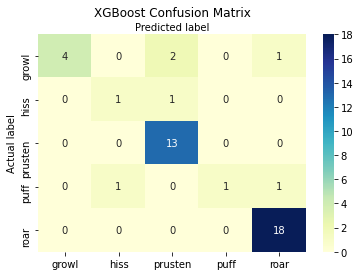

In [23]:
names = sorted(list(set(np.unique(y_test1)).union(set(y_clf1))))

print('Accuracy',clf1.score(X_test, y_test1))

cnf = confusion_matrix(y_test1, y_clf1)
fig, ax = plt.subplots()
tick_marks = np.arange(len(names))
sns.heatmap(cnf, annot = True, xticklabels = names, cmap= "YlGnBu", yticklabels = names)
ax.xaxis.set_label_position('top')
plt.title('XGBoost Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

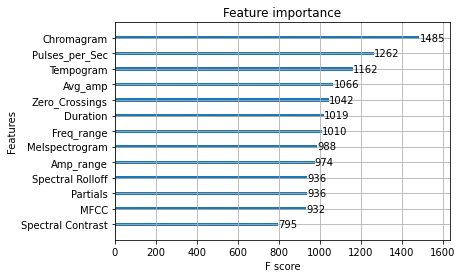

In [24]:
plot_importance(clf1)
figsize=(5,10)
plt.savefig('Feature Importance in Call Classification With XGB.png')

## SVM

In [25]:
svm1 = SVC(probability=True)

In [26]:
svm1.fit(X_train, y_train1)

SVC(probability=True)

In [27]:
svm1.score(X_test, y_test1)

0.813953488372093

In [28]:
y_svm1 = svm1.predict(X_test)
prob_svm1 = svm1.predict_proba(X_test)

In [29]:
print('1. Tested Calls')
print(np.unique(y_test1))
print('2. Predicted Calls')
print(np.unique(y_svm1))
print('3. False Positive')
print(set(np.unique(y_svm1))-set(np.unique(y_test1)))
print('4. False Negative')
print(set(np.unique(y_test1))-set(np.unique(y_svm1)))

1. Tested Calls
['growl' 'hiss' 'prusten' 'puff' 'roar']
2. Predicted Calls
['growl' 'prusten' 'puff' 'roar']
3. False Positive
set()
4. False Negative
{'hiss'}


Accuracy 0.813953488372093


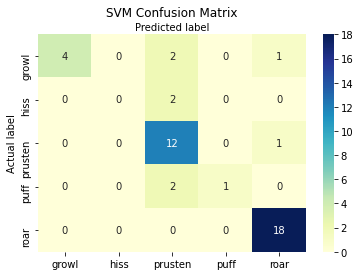

In [30]:
names = sorted(list(set(np.unique(y_test1)).union(set(y_svm1))))

print('Accuracy',svm1.score(X_test, y_test1))

cnf = confusion_matrix(y_test1, y_svm1)
fig, ax = plt.subplots()
tick_marks = np.arange(len(names))
sns.heatmap(cnf, annot = True, xticklabels = names, cmap= "YlGnBu", yticklabels = names)
ax.xaxis.set_label_position('top')
plt.title('SVM Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Logistic Regression

In [31]:
lr1 = LogisticRegression(solver='liblinear', multi_class='ovr',class_weight="balanced")

In [32]:
lr1.fit(X_train,y_train1)

LogisticRegression(class_weight='balanced', multi_class='ovr',
                   solver='liblinear')

In [33]:
lr1.score(X_test, y_test1)

0.9069767441860465

In [34]:
y_lr1 = lr1.predict(X_test)
prob_lr1 = lr1.predict_proba(X_test)

In [35]:
print('1. Tested Calls')
print(np.unique(y_test1))
print('2. Predicted Calls')
print(np.unique(y_lr1))
print('3. Not tested for but predicted')
print(set(np.unique(y_lr1))-set(np.unique(y_test1)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test1))-set(np.unique(y_lr1)))

1. Tested Calls
['growl' 'hiss' 'prusten' 'puff' 'roar']
2. Predicted Calls
['growl' 'hiss' 'prusten' 'puff' 'roar']
3. Not tested for but predicted
set()
4. Tested for but not predicted
set()


Accuracy 0.9069767441860465


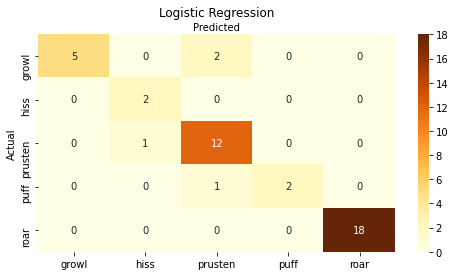

In [36]:
names_lr = sorted(list(set(np.unique(y_test1)).union(set(y_lr1))))
cnf = confusion_matrix(y_test1, y_lr1)
fig, ax = plt.subplots(figsize=(8,4))

print('Accuracy',lr1.score(X_test, y_test1))

sns.heatmap(cnf, annot=True, xticklabels=names_lr, yticklabels=names_lr,cmap= "YlOrBr")
plt.title('Logistic Regression')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

## Decision Tree Classifier

In [37]:
dt1 = DecisionTreeClassifier()

In [38]:
dt1.fit(X_train, y_train1)

DecisionTreeClassifier()

In [39]:
dt1.score(X_test, y_test1)

0.8372093023255814

In [40]:
y_dt1 = dt1.predict(X_test)
prob_dt1 = dt1.predict_proba(X_test)

In [41]:
print('1. Tested Calls')
print(np.unique(y_test1))
print('2. Predicted Calls')
print(np.unique(y_dt1))
print('3. Not tested for but predicted')
print(set(np.unique(y_dt1))-set(np.unique(y_test1)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test1))-set(np.unique(y_dt1)))

1. Tested Calls
['growl' 'hiss' 'prusten' 'puff' 'roar']
2. Predicted Calls
['growl' 'hiss' 'prusten' 'puff' 'roar']
3. Not tested for but predicted
set()
4. Tested for but not predicted
set()


Accuracy 0.8372093023255814


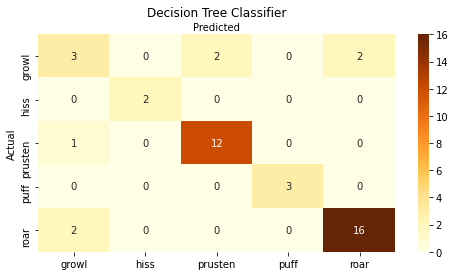

In [42]:
names_cart = sorted(list(set(np.unique(y_test1)).union(set(y_dt1))))
cnf = confusion_matrix(y_test1, y_dt1)
fig, ax = plt.subplots(figsize=(8,4))

print('Accuracy',dt1.score(X_test, y_test1))

sns.heatmap(cnf, annot=True, xticklabels=names_cart, yticklabels=names_cart,cmap= "YlOrBr")
plt.title('Decision Tree Classifier')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)


## Random Forest Classifier

In [43]:
rf1 = RandomForestClassifier()

In [44]:
rf1.fit(X_train, y_train1)

RandomForestClassifier()

In [45]:
rf1.score(X_test, y_test1)

0.8837209302325582

In [46]:
y_rf1 = rf1.predict(X_test)
prob_rf1 = rf1.predict_proba(X_test)

In [47]:
print('1. Tested Calls')
print(np.unique(y_test1))
print('2. Predicted Calls')
print(np.unique(y_rf1))
print('3. Not tested for but predicted')
print(set(np.unique(y_rf1))-set(np.unique(y_test1)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test1))-set(np.unique(y_rf1)))

1. Tested Calls
['growl' 'hiss' 'prusten' 'puff' 'roar']
2. Predicted Calls
['growl' 'hiss' 'prusten' 'puff' 'roar']
3. Not tested for but predicted
set()
4. Tested for but not predicted
set()


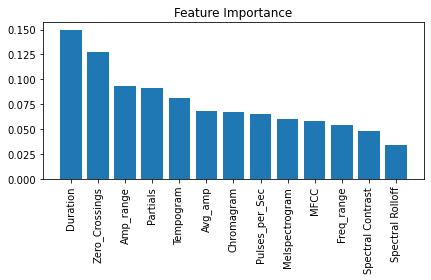

In [48]:
importances = rf1.feature_importances_
imp = np.argsort(importances)[::-1]


plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[imp], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[imp], rotation=90)
plt.tight_layout()
plt.savefig('Feature Importance in Call Classification With Random Forest.png')
plt.show()

Accuracy 0.8837209302325582


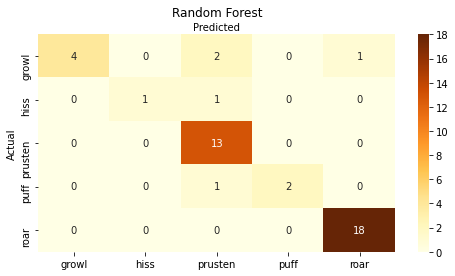

In [49]:
names_rf = sorted(list(set(np.unique(y_test1)).union(set(y_rf1))))
cnf = confusion_matrix(y_test1, y_rf1)
fig, ax = plt.subplots(figsize=(8,4))

print('Accuracy',rf1.score(X_test, y_test1))

sns.heatmap(cnf, annot=True, xticklabels=names_rf, yticklabels=names_rf,cmap= "YlOrBr")
plt.title('Random Forest')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)


In [50]:
print('LBG',lgb1.score(X_test,y_test1))
print('CLF-XGB*',clf1.score(X_test,y_test1))
print('SVM',svm1.score(X_test, y_test1))
print('LR*',lr1.score(X_test, y_test1))
print('DT',dt1.score(X_test, y_test1))
print('RF*',rf1.score(X_test, y_test1))

LBG 0.8604651162790697
CLF-XGB* 0.8604651162790697
SVM 0.813953488372093
LR* 0.9069767441860465
DT 0.8372093023255814
RF* 0.8837209302325582


In [51]:
pred_df = pd.DataFrame(X_test.copy())
pred_df = pred_df.join(df_raw, lsuffix='_Standardized')
classes = clf1.classes_
pred_df['Target'] = y_test1

for i in range(len(classes)):
    pred_df[clf1.classes_[i]] = prob_clf1[:,i]

pred_df['Predicted'] = y_rf1

#pred_df = pred_df[pred_df['Target'] != pred_df['Predicted']]
#pred_df.to_csv('Mislabeled Panterinae Species With RF.csv', index=False)
pred_df.to_csv('Call Classification Data with XGB.csv', index=False)
pred_df.head(3)

,Partials_Standardized,Zero_Crossings_Standardized,Duration_Standardized,Amp_range_Standardized,Avg_amp_Standardized,Freq_range_Standardized,Pulses_per_Sec_Standardized,MFCC_Standardized,Spectral Rolloff_Standardized,Melspectrogram_Standardized,Spectral Contrast_Standardized,Chromagram_Standardized,Tempogram_Standardized,File Name,Partials,Zero_Crossings,Duration,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,MFCC,Spectral Rolloff,Melspectrogram,Spectral Contrast,Chromagram,Tempogram,Target,Mew,growl,hiss,prusten,puff,roar,Predicted
580,-0.499504,-0.255915,-0.347564,-0.633903,-0.643922,0.531333,-0.018145,-0.075369,1.066828,-0.266324,-1.934559,1.589427,-1.654519,Lion Puff 1,0,6263,3,0.087805,0.006066,6692.176632,658.367249,-6.034222,5844.233214,0.022521,15.751444,0.846237,0.069434,puff,0.032458,0.058711,0.373550,0.286260,0.124327,0.124694,prusten
391,-0.424178,-0.581253,-0.605682,-0.776386,-0.725514,-1.249611,-0.845997,-0.535832,-0.253446,-0.271887,0.822950,0.474284,-1.113524,CL-Prusten-5,2,1035,1,0.052863,0.003706,861.000000,121.000000,-7.453342,3258.120450,0.006460,19.668822,0.747218,0.100980,prusten,0.001848,0.001571,0.007988,0.950632,0.033916,0.004046,prusten
454,0.216098,-0.271534,-0.089447,1.236642,0.962205,1.170824,-0.212823,0.208502,0.102013,0.351591,0.400548,-0.439827,-0.638733,Leopard roaring sequence 13,19,6012,5,0.546529,0.052518,8786.000000,532.000000,-5.159347,3954.383341,1.806646,19.068748,0.666050,0.128665,roar,0.003099,0.020320,0.003502,0.004371,0.003831,0.964877,roar


In [52]:
pred_df = pd.DataFrame(X_test.copy())
pred_df = pred_df.join(df_raw, lsuffix='_Standardized')

classes = rf1.classes_

pred_df['Target'] = y_test1

for i in range(len(classes)):
    pred_df[rf1.classes_[i]] = prob_rf1[:,i]

pred_df['Predicted'] = y_rf1

#pred_df = pred_df[pred_df['Target'] != pred_df['Predicted']]
#pred_df.to_csv('Mislabeled Panterinae Species With RF.csv', index=False)
pred_df.to_csv('Call Classification Data with Random Forest.csv', index=False)
pred_df.head(3)

,Partials_Standardized,Zero_Crossings_Standardized,Duration_Standardized,Amp_range_Standardized,Avg_amp_Standardized,Freq_range_Standardized,Pulses_per_Sec_Standardized,MFCC_Standardized,Spectral Rolloff_Standardized,Melspectrogram_Standardized,Spectral Contrast_Standardized,Chromagram_Standardized,Tempogram_Standardized,File Name,Partials,Zero_Crossings,Duration,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,MFCC,Spectral Rolloff,Melspectrogram,Spectral Contrast,Chromagram,Tempogram,Target,Mew,growl,hiss,prusten,puff,roar,Predicted
580,-0.499504,-0.255915,-0.347564,-0.633903,-0.643922,0.531333,-0.018145,-0.075369,1.066828,-0.266324,-1.934559,1.589427,-1.654519,Lion Puff 1,0,6263,3,0.087805,0.006066,6692.176632,658.367249,-6.034222,5844.233214,0.022521,15.751444,0.846237,0.069434,puff,0.01,0.07,0.10,0.35,0.16,0.31,prusten
391,-0.424178,-0.581253,-0.605682,-0.776386,-0.725514,-1.249611,-0.845997,-0.535832,-0.253446,-0.271887,0.822950,0.474284,-1.113524,CL-Prusten-5,2,1035,1,0.052863,0.003706,861.000000,121.000000,-7.453342,3258.120450,0.006460,19.668822,0.747218,0.100980,prusten,0.00,0.00,0.02,0.94,0.03,0.01,prusten
454,0.216098,-0.271534,-0.089447,1.236642,0.962205,1.170824,-0.212823,0.208502,0.102013,0.351591,0.400548,-0.439827,-0.638733,Leopard roaring sequence 13,19,6012,5,0.546529,0.052518,8786.000000,532.000000,-5.159347,3954.383341,1.806646,19.068748,0.666050,0.128665,roar,0.00,0.06,0.00,0.00,0.00,0.94,roar


In [53]:
pred_df = pd.DataFrame(X_test.copy())
pred_df = pred_df.join(df_raw, lsuffix='_Standardized')

classes = lr1.classes_

pred_df['Target'] = y_test1

for i in range(len(classes)):
    pred_df[lr1.classes_[i]] = prob_lr1[:,i]

pred_df['Predicted'] = y_lr1

#pred_df = pred_df[pred_df['Target'] != pred_df['Predicted']]
#pred_df.to_csv('Mislabeled Panterinae Species With RF.csv', index=False)
pred_df.to_csv('Call Classification Data with Logistic Regression.csv', index=False)
pred_df.head(3)

,Partials_Standardized,Zero_Crossings_Standardized,Duration_Standardized,Amp_range_Standardized,Avg_amp_Standardized,Freq_range_Standardized,Pulses_per_Sec_Standardized,MFCC_Standardized,Spectral Rolloff_Standardized,Melspectrogram_Standardized,Spectral Contrast_Standardized,Chromagram_Standardized,Tempogram_Standardized,File Name,Partials,Zero_Crossings,Duration,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,MFCC,Spectral Rolloff,Melspectrogram,Spectral Contrast,Chromagram,Tempogram,Target,Mew,growl,hiss,prusten,puff,roar,Predicted
580,-0.499504,-0.255915,-0.347564,-0.633903,-0.643922,0.531333,-0.018145,-0.075369,1.066828,-0.266324,-1.934559,1.589427,-1.654519,Lion Puff 1,0,6263,3,0.087805,0.006066,6692.176632,658.367249,-6.034222,5844.233214,0.022521,15.751444,0.846237,0.069434,puff,0.016152,0.059559,0.060122,0.536120,0.160110,0.167937,prusten
391,-0.424178,-0.581253,-0.605682,-0.776386,-0.725514,-1.249611,-0.845997,-0.535832,-0.253446,-0.271887,0.822950,0.474284,-1.113524,CL-Prusten-5,2,1035,1,0.052863,0.003706,861.000000,121.000000,-7.453342,3258.120450,0.006460,19.668822,0.747218,0.100980,prusten,0.010656,0.008102,0.185176,0.685323,0.025077,0.085666,prusten
454,0.216098,-0.271534,-0.089447,1.236642,0.962205,1.170824,-0.212823,0.208502,0.102013,0.351591,0.400548,-0.439827,-0.638733,Leopard roaring sequence 13,19,6012,5,0.546529,0.052518,8786.000000,532.000000,-5.159347,3954.383341,1.806646,19.068748,0.666050,0.128665,roar,0.060439,0.055147,0.009390,0.106619,0.026995,0.741409,roar


# Species Classification

## Splitting data

In [54]:
y_train2 = y_train.Species
y_test2 = y_test.Species

In [55]:
## LightGBM

In [56]:
import lightgbm as lgb
lgb2 = lgb.LGBMClassifier()
lgb2.fit(X_train, y_train2)

LGBMClassifier()

In [57]:
lgb2.score(X_test,y_test2)

0.813953488372093

## XGBoost

In [58]:
parameters = dict(
    objective='multi:softprob',
    random_state = 30,
    max_depth=9,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.4,
    tree_method='gpu_hist')
#eval_metric='mlogloss'

clf2 = XGBClassifier(**parameters, n_estimators=1200)

In [59]:
clf2.fit(X_train, y_train2)

[14:06:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1200, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=30, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [60]:
clf2.score(X_test,y_test2)

0.8604651162790697

In [61]:
y_clf2 = clf2.predict(X_test)
prob_clf2 = clf2.predict_proba(X_test)

In [62]:
print('1. Tested Species')
print(np.unique(y_test2))
print('2. Predicted Species')
print(np.unique(y_clf2))
print('3. Not tested for but predicted')
print(set(np.unique(y_clf2))-set(np.unique(y_test2)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test2))-set(np.unique(y_clf2)))

1. Tested Species
['Clouded leopard' 'Jaguar' 'Leopard' 'Lion']
2. Predicted Species
['Clouded leopard' 'Jaguar' 'Leopard' 'Lion']
3. Not tested for but predicted
set()
4. Tested for but not predicted
set()


Accuracy 0.8604651162790697


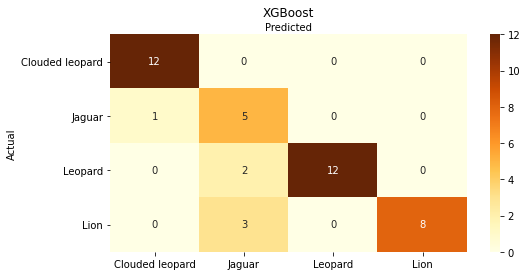

In [63]:
names = sorted(list(set(np.unique(y_test2)).union(set(y_clf2))))
cnf = confusion_matrix(y_test2, y_clf2)
fig, ax = plt.subplots(figsize=(8,4))

print('Accuracy',clf2.score(X_test, y_test2))

sns.heatmap(cnf, annot=True, xticklabels=names, yticklabels=names,cmap= "YlOrBr")
plt.title('XGBoost')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)


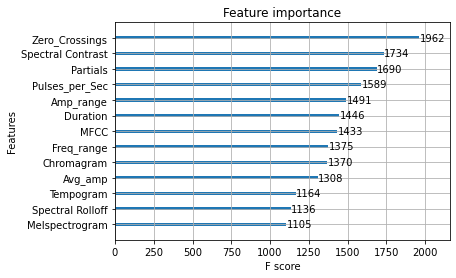

In [64]:
plot_importance(clf2)
figsize=(8,4)
plt.savefig('Feature Importance in Species Classification With XGB.png')

## SVM

In [65]:
svm2 = SVC(probability=True)

In [66]:
svm2.fit(X_train, y_train2)

SVC(probability=True)

In [67]:
svm2.score(X_test, y_test2)

0.8372093023255814

In [68]:
y_svm2=svm2.predict(X_test)
prob_svm2 = svm2.predict_proba(X_test)

In [69]:
print('1. Tested Species')
print(np.unique(y_test2))
print('2. Predicted Species')
print(np.unique(y_svm2))
print('3. False Positive')
print(set(np.unique(y_svm2))-set(np.unique(y_test2)))
print('4. False Negative')
print(set(np.unique(y_test2))-set(np.unique(y_svm2)))

1. Tested Species
['Clouded leopard' 'Jaguar' 'Leopard' 'Lion']
2. Predicted Species
['Clouded leopard' 'Jaguar' 'Leopard' 'Lion']
3. False Positive
set()
4. False Negative
set()


Accuracy 0.8372093023255814


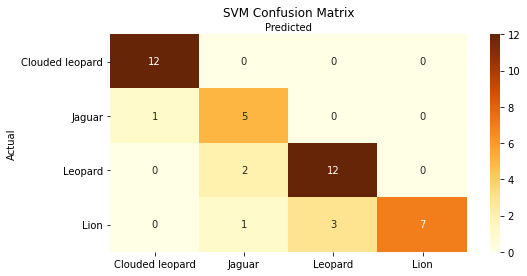

In [70]:
names_svc = sorted(list(set(np.unique(y_test2)).union(set(y_svm2))))
cnf = confusion_matrix(y_test2, y_svm2)
fig, ax = plt.subplots(figsize=(8,4))

print('Accuracy',svm2.score(X_test, y_test2))

sns.heatmap(cnf, annot=True, xticklabels=names_svc, yticklabels=names_svc,cmap= "YlOrBr")
plt.title('SVM Confusion Matrix')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)



## Logistic Regression

In [71]:
lr2 = LogisticRegression(solver='liblinear', multi_class='ovr')

In [72]:
lr2.fit(X_train,y_train2)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [73]:
lr2.score(X_test, y_test2)

0.7906976744186046

In [74]:
y_lr2 = lr2.predict(X_test)
prob_lr2 = lr2.predict_proba(X_test)

In [75]:
print('1. Tested Species')
print(np.unique(y_test))
print('2. Predicted Species')
print(np.unique(y_lr2))
print('3. Not tested for but predicted')
print(set(np.unique(y_lr2))-set(np.unique(y_test)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test))-set(np.unique(y_lr2)))

1. Tested Species
['Clouded leopard' 'Jaguar' 'Leopard' 'Lion' 'growl' 'hiss' 'prusten'
 'puff' 'roar']
2. Predicted Species
['Clouded leopard' 'Jaguar' 'Leopard' 'Lion']
3. Not tested for but predicted
set()
4. Tested for but not predicted
{'hiss', 'roar', 'puff', 'growl', 'prusten'}


Accuracy 0.7906976744186046


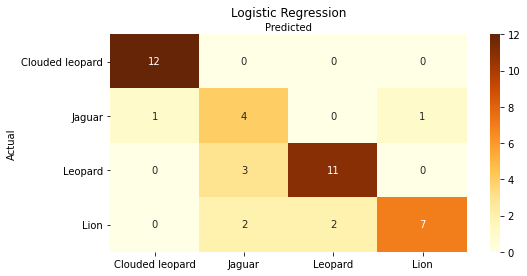

In [76]:
names_lr = sorted(list(set(np.unique(y_test2)).union(set(y_lr2))))
cnf = confusion_matrix(y_test2, y_lr2)
fig, ax = plt.subplots(figsize=(8,4))

print('Accuracy',lr2.score(X_test, y_test2))

sns.heatmap(cnf, annot=True, xticklabels=names_lr, yticklabels=names_lr,cmap= "YlOrBr")
plt.title('Logistic Regression')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)


## Decision Tree Classifier

In [77]:
dt2 = DecisionTreeClassifier()

In [78]:
dt2.fit(X_train, y_train2)

DecisionTreeClassifier()

In [79]:
dt2.score(X_test, y_test2)

0.7209302325581395

In [80]:
y_dt2 = dt2.predict(X_test)
prob_dt2 = dt2.predict_proba(X_test)

In [81]:
print('1. Tested Species')
print(np.unique(y_test2))
print('2. Predicted Species')
print(np.unique(y_dt2))
print('3. Not tested for but predicted')
print(set(np.unique(y_dt2))-set(np.unique(y_test2)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test2))-set(np.unique(y_dt2)))

1. Tested Species
['Clouded leopard' 'Jaguar' 'Leopard' 'Lion']
2. Predicted Species
['Clouded leopard' 'Jaguar' 'Leopard' 'Lion' 'Snow leopard']
3. Not tested for but predicted
{'Snow leopard'}
4. Tested for but not predicted
set()


Accuracy 0.7209302325581395


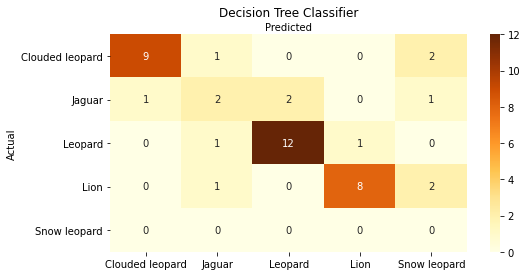

In [82]:
names_cart = sorted(list(set(np.unique(y_test2)).union(set(y_dt2))))
cnf = confusion_matrix(y_test2, y_dt2)
fig, ax = plt.subplots(figsize=(8,4))

print('Accuracy',dt2.score(X_test, y_test2))

sns.heatmap(cnf, annot=True, xticklabels=names_cart, yticklabels=names_cart,cmap= "YlOrBr")
plt.title('Decision Tree Classifier')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)


## Random Forest Classifier

In [83]:
rf2 = RandomForestClassifier()

In [84]:
rf2.fit(X_train, y_train2)

RandomForestClassifier()

In [85]:
rf2.score(X_test, y_test2)

0.8372093023255814

In [86]:
y_rf2 = rf2.predict(X_test)
prob_rf2 = rf2.predict_proba(X_test)

In [87]:
print('1. Tested Species')
print(np.unique(y_test2))
print('2. Predicted Species')
print(np.unique(y_rf2))
print('3. Not tested for but predicted')
print(set(np.unique(y_rf2))-set(np.unique(y_test2)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test2))-set(np.unique(y_rf2)))

1. Tested Species
['Clouded leopard' 'Jaguar' 'Leopard' 'Lion']
2. Predicted Species
['Clouded leopard' 'Jaguar' 'Leopard' 'Lion']
3. Not tested for but predicted
set()
4. Tested for but not predicted
set()


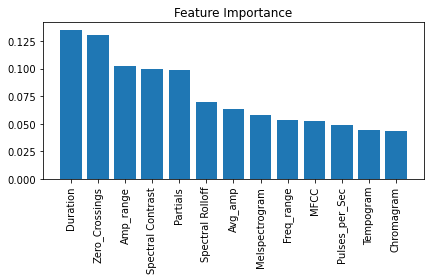

In [88]:
importances = rf2.feature_importances_
imp = np.argsort(importances)[::-1]


plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[imp], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[imp], rotation=90)
plt.tight_layout()
plt.savefig('Feature Importance in Species Classification With Random Forest.png')
plt.show()

Accuracy 0.8372093023255814


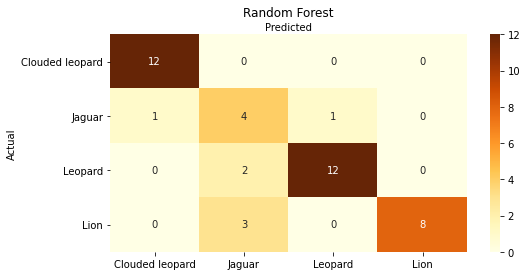

In [89]:
names_rf = sorted(list(set(np.unique(y_test2)).union(set(y_rf2))))
cnf = confusion_matrix(y_test2, y_rf2)
fig, ax = plt.subplots(figsize=(8,4))

print('Accuracy',rf2.score(X_test, y_test2))

sns.heatmap(cnf, annot=True, xticklabels=names_rf, yticklabels=names_rf,cmap= "YlOrBr")
plt.title('Random Forest')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [90]:
print('LBG*',lgb2.score(X_test,y_test2))
print('CLF-XGB**',clf2.score(X_test,y_test2))
print('SVM*',svm2.score(X_test, y_test2))
print('LR',lr2.score(X_test, y_test2))
print('DT',dt2.score(X_test, y_test2))
print('RF**',rf2.score(X_test, y_test2))

LBG* 0.813953488372093
CLF-XGB** 0.8604651162790697
SVM* 0.8372093023255814
LR 0.7906976744186046
DT 0.7209302325581395
RF** 0.8372093023255814


In [91]:
pred_df = pd.DataFrame(X_test.copy())
pred_df = pred_df.join(df_raw, lsuffix='_Standardized')
classes = clf2.classes_
pred_df['Target'] = y_test2

for i in range(len(classes)):
    pred_df[clf2.classes_[i]] = prob_clf2[:,i]

pred_df['Predicted'] = y_clf2

#pred_df = pred_df[pred_df['Target'] != pred_df['Predicted']]
#pred_df.to_csv('Mislabeled Panterinae Species With RF.csv', index=False)
pred_df.to_csv('Species Classification Data with XGB.csv', index=False)
pred_df.head(3)

,Partials_Standardized,Zero_Crossings_Standardized,Duration_Standardized,Amp_range_Standardized,Avg_amp_Standardized,Freq_range_Standardized,Pulses_per_Sec_Standardized,MFCC_Standardized,Spectral Rolloff_Standardized,Melspectrogram_Standardized,Spectral Contrast_Standardized,Chromagram_Standardized,Tempogram_Standardized,File Name,Partials,Zero_Crossings,Duration,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,MFCC,Spectral Rolloff,Melspectrogram,Spectral Contrast,Chromagram,Tempogram,Target,Clouded leopard,Jaguar,Leopard,Lion,Snow leopard,Predicted
580,-0.499504,-0.255915,-0.347564,-0.633903,-0.643922,0.531333,-0.018145,-0.075369,1.066828,-0.266324,-1.934559,1.589427,-1.654519,Lion Puff 1,0,6263,3,0.087805,0.006066,6692.176632,658.367249,-6.034222,5844.233214,0.022521,15.751444,0.846237,0.069434,Lion,0.021637,0.549845,0.368624,0.014676,0.045217,Jaguar
391,-0.424178,-0.581253,-0.605682,-0.776386,-0.725514,-1.249611,-0.845997,-0.535832,-0.253446,-0.271887,0.822950,0.474284,-1.113524,CL-Prusten-5,2,1035,1,0.052863,0.003706,861.000000,121.000000,-7.453342,3258.120450,0.006460,19.668822,0.747218,0.100980,Clouded leopard,0.912535,0.031217,0.009392,0.005302,0.041554,Clouded leopard
454,0.216098,-0.271534,-0.089447,1.236642,0.962205,1.170824,-0.212823,0.208502,0.102013,0.351591,0.400548,-0.439827,-0.638733,Leopard roaring sequence 13,19,6012,5,0.546529,0.052518,8786.000000,532.000000,-5.159347,3954.383341,1.806646,19.068748,0.666050,0.128665,Leopard,0.002886,0.015164,0.973170,0.005717,0.003063,Leopard


In [92]:
pred_df = pd.DataFrame(X_test.copy())
pred_df = pred_df.join(df_raw, lsuffix='_Standardized')
classes = rf2.classes_
pred_df['Target'] = y_test2

for i in range(len(classes)):
    pred_df[rf2.classes_[i]] = prob_rf2[:,i]

pred_df['Predicted'] = y_rf2

#pred_df = pred_df[pred_df['Target'] != pred_df['Predicted']]
#pred_df.to_csv('Mislabeled Panterinae Species With RF.csv', index=False)
pred_df.to_csv('Species Classification Data with Random Forest.csv', index=False)
pred_df.head(3)

,Partials_Standardized,Zero_Crossings_Standardized,Duration_Standardized,Amp_range_Standardized,Avg_amp_Standardized,Freq_range_Standardized,Pulses_per_Sec_Standardized,MFCC_Standardized,Spectral Rolloff_Standardized,Melspectrogram_Standardized,Spectral Contrast_Standardized,Chromagram_Standardized,Tempogram_Standardized,File Name,Partials,Zero_Crossings,Duration,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,MFCC,Spectral Rolloff,Melspectrogram,Spectral Contrast,Chromagram,Tempogram,Target,Clouded leopard,Jaguar,Leopard,Lion,Snow leopard,Predicted
580,-0.499504,-0.255915,-0.347564,-0.633903,-0.643922,0.531333,-0.018145,-0.075369,1.066828,-0.266324,-1.934559,1.589427,-1.654519,Lion Puff 1,0,6263,3,0.087805,0.006066,6692.176632,658.367249,-6.034222,5844.233214,0.022521,15.751444,0.846237,0.069434,Lion,0.07,0.47,0.18,0.13,0.15,Jaguar
391,-0.424178,-0.581253,-0.605682,-0.776386,-0.725514,-1.249611,-0.845997,-0.535832,-0.253446,-0.271887,0.822950,0.474284,-1.113524,CL-Prusten-5,2,1035,1,0.052863,0.003706,861.000000,121.000000,-7.453342,3258.120450,0.006460,19.668822,0.747218,0.100980,Clouded leopard,0.82,0.09,0.03,0.00,0.06,Clouded leopard
454,0.216098,-0.271534,-0.089447,1.236642,0.962205,1.170824,-0.212823,0.208502,0.102013,0.351591,0.400548,-0.439827,-0.638733,Leopard roaring sequence 13,19,6012,5,0.546529,0.052518,8786.000000,532.000000,-5.159347,3954.383341,1.806646,19.068748,0.666050,0.128665,Leopard,0.00,0.06,0.90,0.03,0.01,Leopard


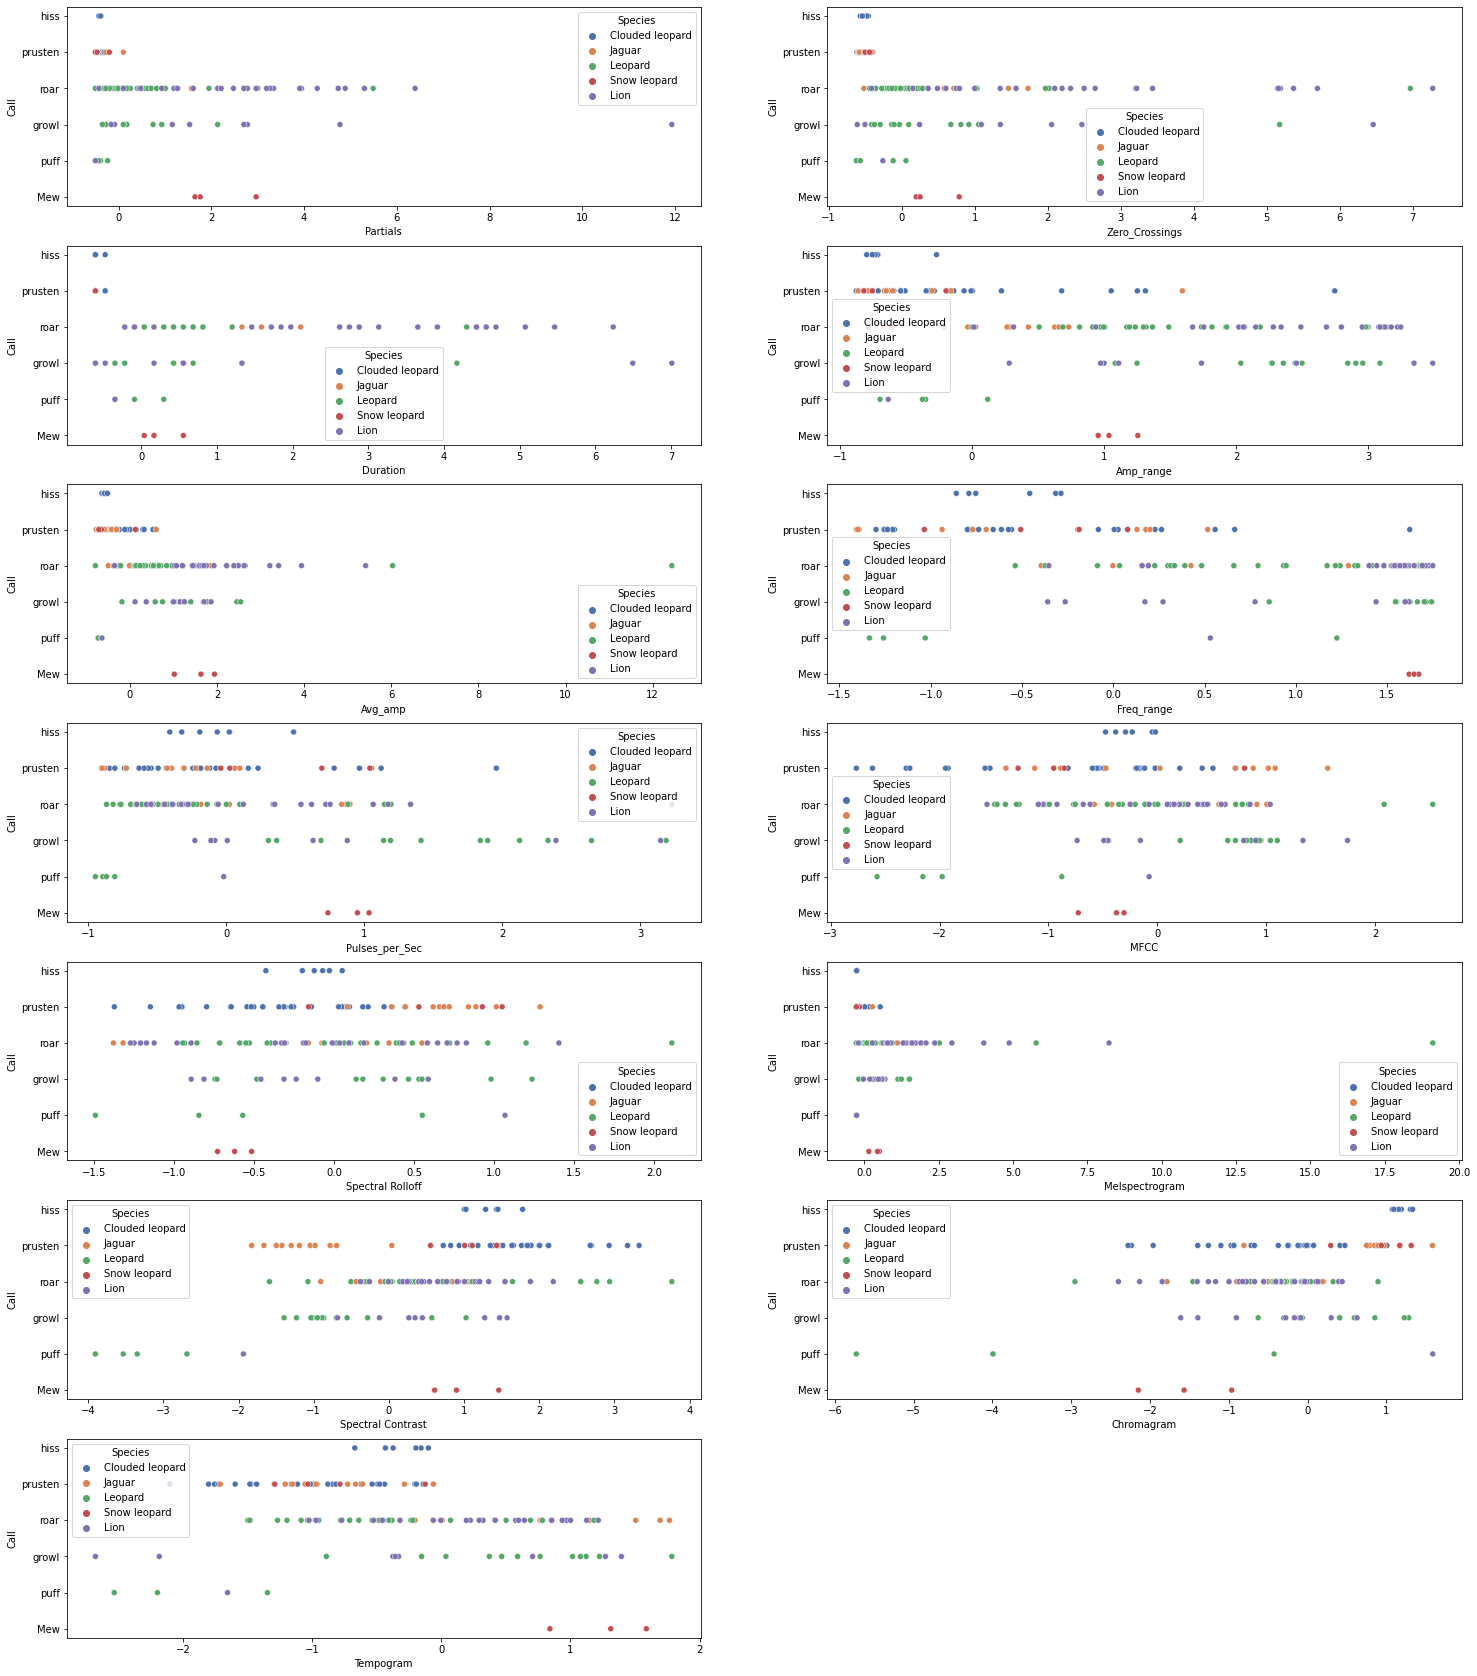

In [93]:
l= ['Partials', 'Zero_Crossings', 'Duration', 'Amp_range', 'Avg_amp',
       'Freq_range', 'Pulses_per_Sec', 'MFCC', 'Spectral Rolloff',
       'Melspectrogram', 'Spectral Contrast', 'Chromagram','Tempogram']

plt.figure(figsize=(25,30))
for i in range(len(l)):
    plt.subplot(7,2,i+1)
    sns.scatterplot(df[l[i]], df['Call'], hue=df['Species'], legend='brief', palette='deep') 
plt.savefig('Call Clusters By Features.pdf')
plt.show()

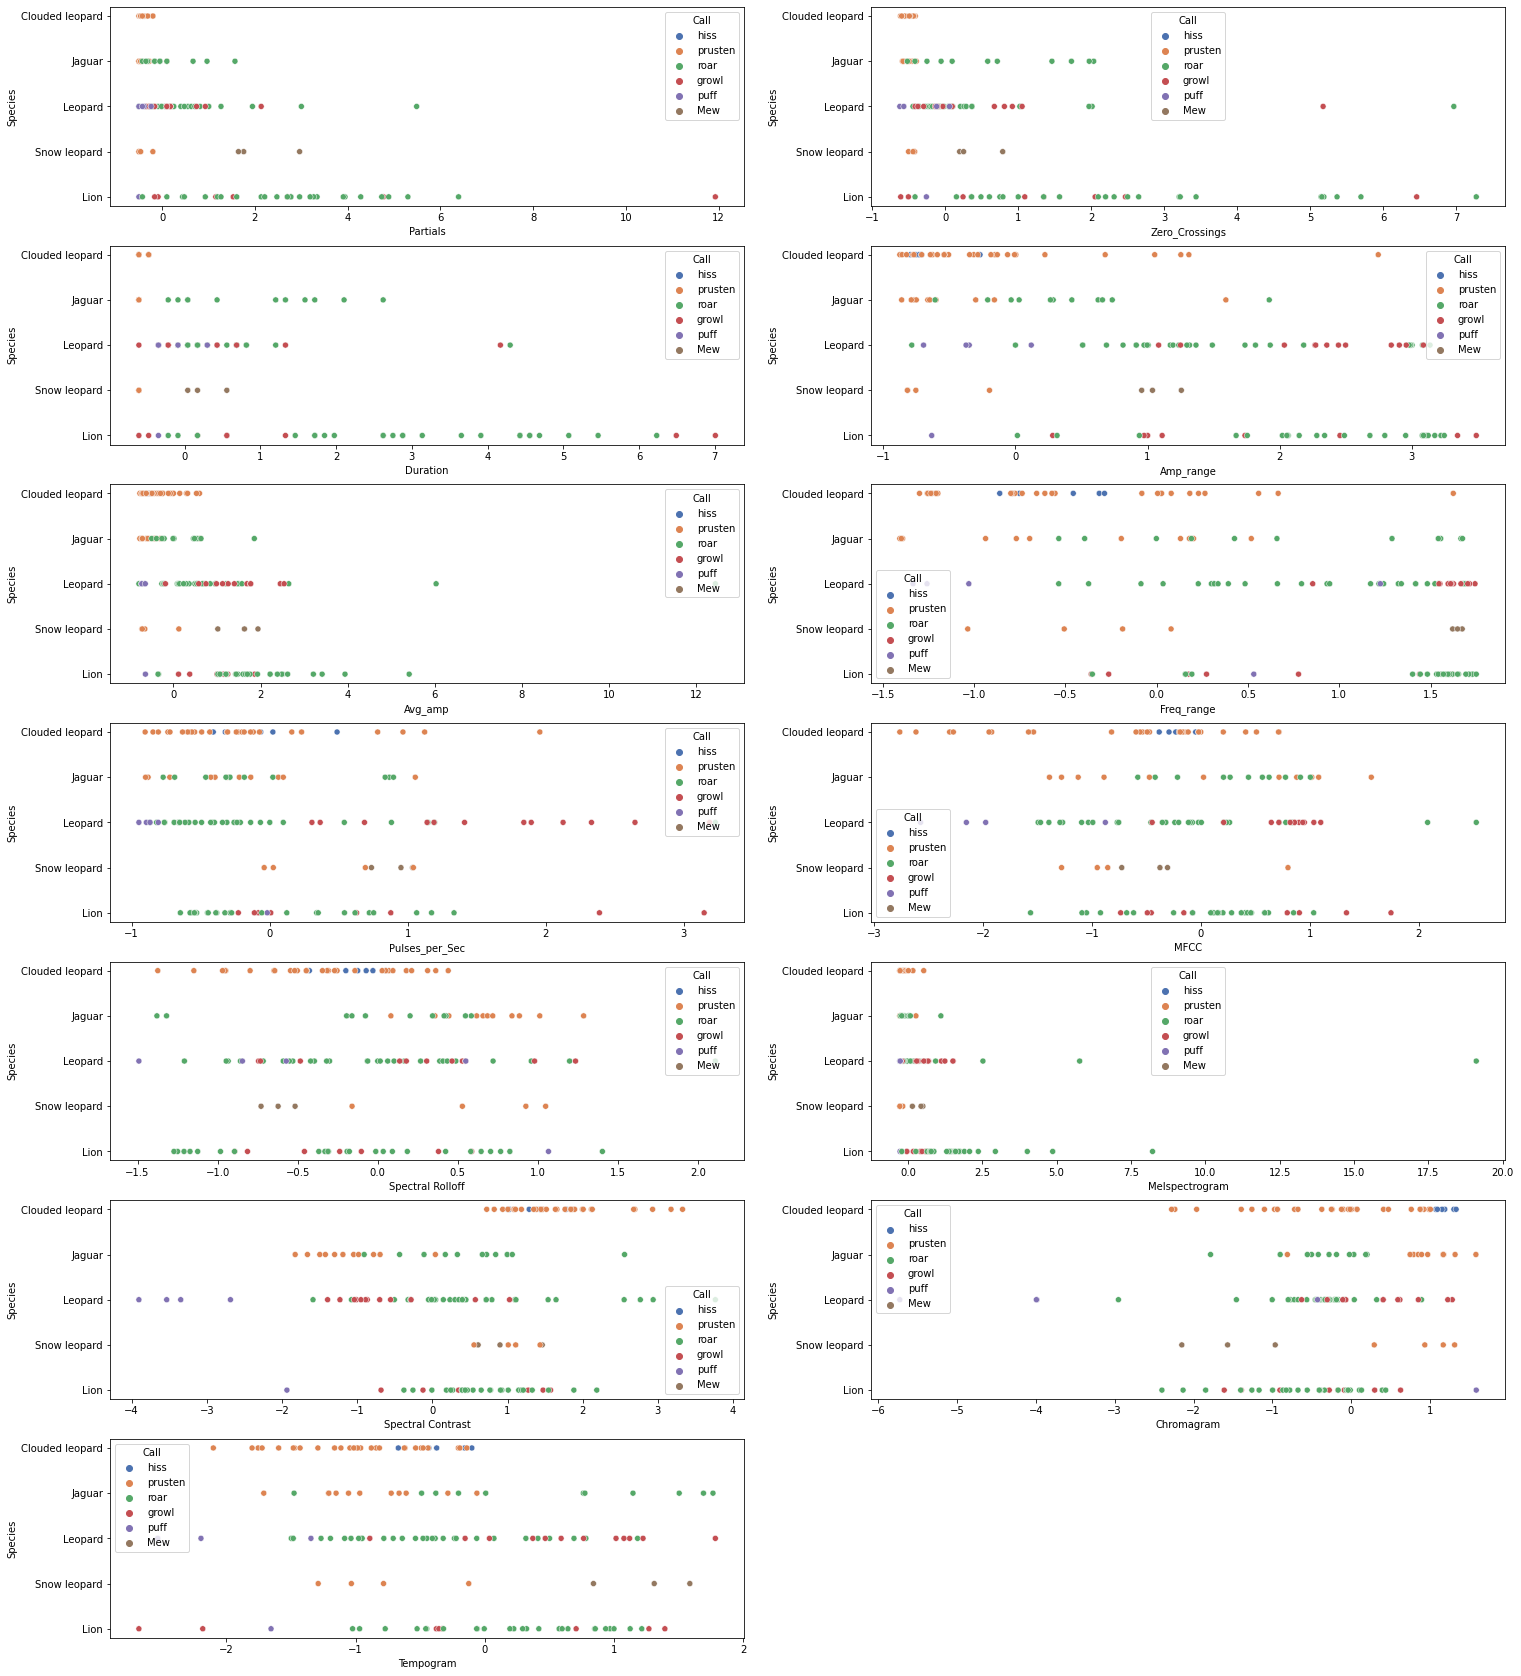

In [94]:
l= ['Partials', 'Zero_Crossings', 'Duration', 'Amp_range', 'Avg_amp',
       'Freq_range', 'Pulses_per_Sec', 'MFCC', 'Spectral Rolloff',
       'Melspectrogram', 'Spectral Contrast', 'Chromagram','Tempogram']

plt.figure(figsize=(25,30))
for i in range(len(l)):
    plt.subplot(7,2,i+1)
    sns.scatterplot(df[l[i]], df['Species'], hue=df['Call'], legend='brief', palette='deep') 
plt.savefig('Species Clusters By Features.pdf')
plt.show()